In [16]:
# Import the necessary libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np

In [17]:
# Download NLTK's VADER lexicon
nltk.download('vader_lexicon')
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ansar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
# Assuming 'IMDB_dataset_320.000_reviews.csv' is the correct file path
df = pd.read_csv('IMDB_dataset_320.000_reviews.csv')

# Display the first few rows of the DataFrame
df.head()

,id number,Greek title,original title,category,director/creator,movie lenght,movie date,author,review date,review title,review,label,mean of stars,number of reviews,full reviews average stars,url
0,0,Lekin...,Lekin...,Drama,Gulzar,2 hours 51 minutes,1990,dwnpiyush-336-40603,8 April 2012,For those who don't mind a slow pacing to the...,"""Yaara Sili Sili Virah Ki Raat Ka Jalna""'Lekin...",8,9.16,6,7.5,https://www.imdb.com/title/tt00100002/?ref_=tt...
1,1,Lekin...,Lekin...,Drama,Gulzar,2 hours 51 minutes,1990,cseabhi,10 July 2021,Lekin - Gulzar's haunting masterpiece,Gulzar is at his best when he is telling such ...,9,9.16,6,7.5,https://www.imdb.com/title/tt00100002/?ref_=tt...
2,2,Lekin...,Lekin...,Drama,Gulzar,2 hours 51 minutes,1990,abbott32,2 July 2004,Haunting film but would love to have been abl...,I was completely mesmerized by Lekin and espec...,9,9.16,6,7.5,https://www.imdb.com/title/tt00100002/?ref_=tt...
3,3,Lekin...,Lekin...,Drama,Gulzar,2 hours 51 minutes,1990,monoglot,29 November 2005,An intriguing story well told.,Greatly enjoyed the development of the story l...,9,9.16,6,7.5,https://www.imdb.com/title/tt00100002/?ref_=tt...
4,4,Lekin...,Lekin...,Drama,Gulzar,2 hours 51 minutes,1990,Kammu,27 November 1999,It's a classic,"The lines of time are very blurry. Past, prese...",10,9.16,6,7.5,https://www.imdb.com/title/tt00100002/?ref_=tt...


In [19]:
df.columns

Index(['id number', 'Greek title', 'original title', 'category',
       'director/creator', 'movie lenght', 'movie date', 'author',
       'review date', 'review title', 'review', 'label', 'mean of stars',
       'number of reviews', 'full reviews average stars', 'url'],
      dtype='object')

In [20]:
# Define a function to analyze the sentiment of a movie review
def analyze_sentiment(review):
    score = sia.polarity_scores(review)['compound']
    return 'positive' if score >= 0 else 'negative'

In [21]:
# list of movie reviews
movie_reviews = df['review']

In [22]:
# Analyze the sentiment of each review
sentiments = [analyze_sentiment(review) for review in movie_reviews]

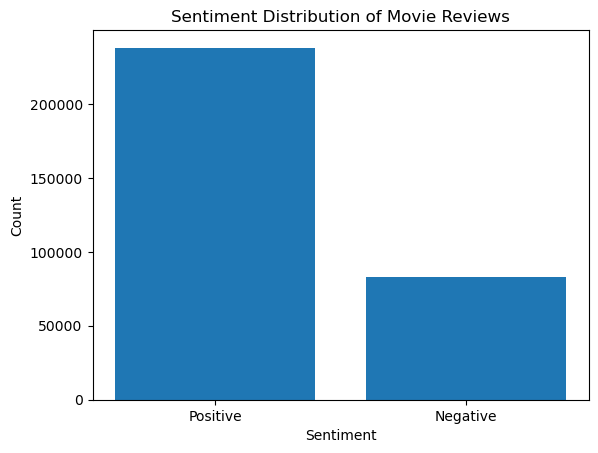

In [39]:
# Visualize the sentiment distribution
plt.bar(['Positive', 'Negative'], [positive_count, negative_count])
plt.title('Sentiment Distribution of Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

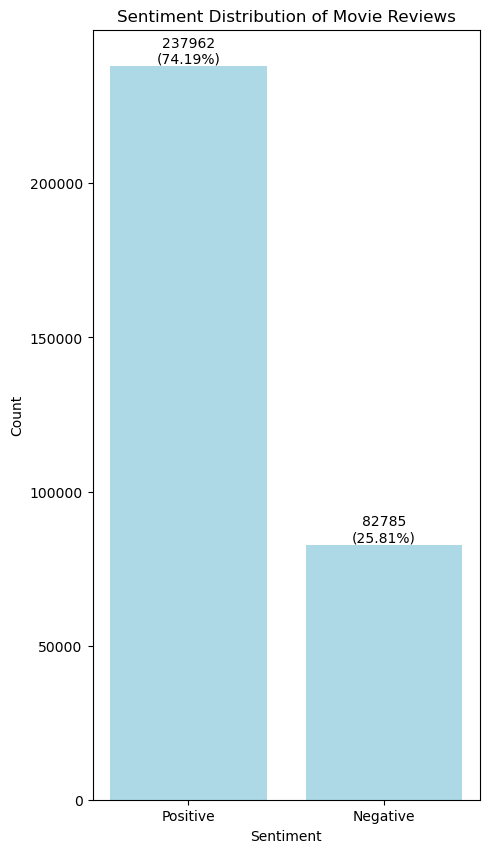

In [44]:
# Count the occurrences of each sentiment
positive_count = sentiments.count('positive')
negative_count = sentiments.count('negative')
total_reviews = len(sentiments)

# Calculate percentage of positive and negative sentiments
positive_percentage = (positive_count / total_reviews) * 100
negative_percentage = (negative_count / total_reviews) * 100

# Plot the bar chart
plt.figure(figsize=(5,10))
plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color='lightblue')
plt.title('Sentiment Distribution of Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Add count and percentage values on top of the bars
for i, count in enumerate([positive_count, negative_count]):
    plt.text(i, count + 0.1, f'{count}\n({(count / total_reviews) * 100:.2f}%)', ha='center', va='bottom')

plt.show()